# Caso de Estudo Cyclistic

---
# Introdução
O objetivo deste projeto é entregar uma análise detalhada dos membros da empresa Cyclistic ao time de análise de marketing para criar estratégias com o intuito de obter novos membros anuais.

# Descrição da Empresa Cyclistic
A Cyclistic é uma empresa que oferece programas de bike-sharing que conta com mais de 5.800 bicicletas e 600 bicicletários. A Cyclistic se diferencia por oferecer uma série de diferentes tipos de bicicletas como reclinaveis, triciclos e até de carga fazendo assim o compartilhamento de bicicletas mais inclusivo com pessoas que possuem algum tipo de deficiência que não podem estar usufruindo do modelo padrão de duas rodas.

# Fase de Perguntas
---
## Questões Guia
1. De que maneira membros anuais e casuais diferem ao usar as bicicletas da Cyclistic?

2. Por qual motivo membros casuals assinariam uma inscrição anual?

3. Como a Cyclistic pode usar as mídias digitais para influenciar ciclistas casuals a virarem membros?

## Tarefas Chave
### Identificar o Problema de Negócios:
O foco é capitalizar inscrições anuais pois estas são mais rentáveis do que inscrições casuais e tendem a ser a chave para o crescimento da Cyclistic. <br><br>
### Considerar os Stakeholders Chave

-   **Stakeholders Primários**\
    Lily Moreno: Diretora de marketing.<br>
    Time executivo da Cylistic
    <br><br>
-   **Stakeholders Secundários**\
    Time de Análise de Marketing da Cyclistic
    
# Fase de Preparo
---
### 1. Onde os dados estão armazenados?
Os dados podem ser encontrados em seu formato bruto neste [link](https://divvy-tripdata.s3.amazonaws.com/index.html). Os arquivos utilizados para esta análise são de 06/2021 a 05/2022.

### 2. Como os dados estão organizados?
Estão organizados em múltiplos arquivos num período de um ano. Estes arquivos são então unidos em um arquivo que contém 738MB contendo 15 colunas nos formatos a seguir: <br>
1.	Continuos
    1.	start_lat
    2.	start_lng
    3.	end_lat
    4.	end_lng
    <br>
    
2.	Ordinais
    1.	ride_id
    2.	start_station_id
    3.	end_station_id
    4.	day_of_week
    <br>
    
3.	Nominais
    1.	rideable_type
    2.	start_station_name
    3.	end_station_name
    4.  member_casual
    <br>

    
4.	Quantitativos
    1.	started_at
    2.	ended_at
    3.	ride_length

### 3. Utilizando ROCCC para avaliar os dados
Reliability(Confiabilidade): Os dados utilizados neste projeto são confiáveis e tem de amplo tamanho contendo 5860776 registros únicos. Não foram encontrado viés nos dados.<br><br>

Originality(Originalidade): Este dataset é original, ele foi coletado dos sistemas da Cyclistic, podendo assim serem considerados dados primários.<br><br>
Comprehensiveness(Compreensividade): A análise teria mais profundidade se houvessem registros de gênero e/ou idade dos participantes, no mais, os dados podem ser considerados como bons. <br><br>

Current(Atualidade): Os dados são relevantes pois foram colectados em um período recente(no ano passado).<br><br>

Cited(Fonte): Os dados foram criados e coletados nos sistemas da Cyclistic pelo marketing team da própria empresa, sendo assim considerados confiáveis.<br><br>

Estes dados são considerados de boa qualidade e recomendados para a produção de análises.

# Fase de Processamento
---

### Carregando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Carregando e Unindo datasets

In [2]:
june21 = pd.read_csv('202106-divvy-tripdata.csv')
july21 = pd.read_csv('202107-divvy-tripdata.csv')
aug21 = pd.read_csv('202108-divvy-tripdata.csv')
sep21 = pd.read_csv('202109-divvy-tripdata.csv')
oct21 = pd.read_csv('202110-divvy-tripdata.csv')
nov21 = pd.read_csv('202111-divvy-tripdata.csv')
dez21 = pd.read_csv('202112-divvy-tripdata.csv')
jan22 = pd.read_csv('202201-divvy-tripdata.csv')
feb22 = pd.read_csv('202202-divvy-tripdata.csv')
mar22 = pd.read_csv('202203-divvy-tripdata.csv')
apr22 = pd.read_csv('202204-divvy-tripdata.csv')
may22 = pd.read_csv('202205-divvy-tripdata.csv')

csv_list = [june21, july21, aug21, sep21, oct21, nov21, dez21, 
            jan22, feb22, mar22, apr22, may22]
df = pd.concat(csv_list)

### Deletando variaveis que não serão utilizadas para liberar memória RAM

In [3]:
del june21, july21, aug21, sep21, oct21, nov21, dez21, jan22, feb22, mar22, apr22, may22

## Visão geral do Dataframe

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NaN,NaN,NaN,NaN,41.80,-87.59,41.80,-87.60,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NaN,NaN,NaN,NaN,41.79,-87.59,41.80,-87.60,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NaN,NaN,NaN,NaN,41.80,-87.60,41.79,-87.59,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NaN,NaN,NaN,NaN,41.78,-87.58,41.80,-87.60,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NaN,NaN,NaN,NaN,41.80,-87.59,41.79,-87.59,member


### Tipos de Colunas

In [5]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

### Tamanho do Dataframe

In [6]:
len(df)

5860776

### Removendo Colunas

Para essa análise, os ids das estações e seus nomes não serão utilizados, sendo assim removidos.

In [7]:
df.drop(['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id'], axis = 1, inplace = True)

### Valores Faltantes

In [8]:
df.isnull().sum()

ride_id             0
rideable_type       0
started_at          0
ended_at            0
start_lat           0
start_lng           0
end_lat          5036
end_lng          5036
member_casual       0
dtype: int64

5036 valores encontrados, como fazem parte de uma pequena fatia (menor que 1%) do dataframe, eles serão removidos.

In [9]:
df = df.dropna(subset=['end_lat', 'end_lng'])

In [10]:
len(df)

5855740

### Valores Duplicados

In [11]:
df.duplicated().value_counts()

False    5855740
dtype: int64

Nenhum valor duplicado foi encontrado.

### Alterando os Tipos das Colunas

In [12]:
df = df.astype({'started_at': 'datetime64[ns]', 
           'ended_at': 'datetime64[ns]'})

In [13]:
df.dtypes

ride_id                  object
rideable_type            object
started_at       datetime64[ns]
ended_at         datetime64[ns]
start_lat               float64
start_lng               float64
end_lat                 float64
end_lng                 float64
member_casual            object
dtype: object

### Criando a Coluna ride_length (duração da viagem)

In [14]:
df['ride_length'] = df['ended_at'] - df['started_at']

### Formatando ride_length no formato de minutos

In [15]:
df = df.astype({'ride_length': 'timedelta64[m]'})

### Criando a Coluna day_of_week

In [16]:
#Esta coluna serve para sinalizar em que dia da semana ocorreu a viagem
df['day_of_week'] = df['started_at'].dt.day_name()

### Criando a Coluna hour_of_day

In [17]:
df['hour_of_day'] = df['started_at'].dt.hour

### Transformando latitude e longitude em kilometros e metros

In [18]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    Versão levemente modificada de: http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

df['distance_km'] = \
    haversine(df.start_lat.shift(), df.start_lng.shift(),
                 df.end_lat, df.end_lng)

df['distance_meters'] = \
    haversine(df.start_lat.shift(), df.start_lng.shift(),
                 df.end_lat, df.end_lng) * 1000

In [19]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,hour_of_day,distance_km,distance_meters
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,41.80,-87.59,41.80,-87.60,member,2.0,Sunday,14,NaN,NaN
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,41.79,-87.59,41.80,-87.60,member,6.0,Friday,11,0.828931,828.931491
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,41.80,-87.60,41.79,-87.59,member,5.0,Friday,9,0.000000,0.000000
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,41.78,-87.58,41.80,-87.60,member,25.0,Thursday,19,0.000000,0.000000
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,41.80,-87.59,41.79,-87.59,member,4.0,Friday,14,1.387040,1387.040104


In [20]:
df.isnull().sum()

ride_id            0
rideable_type      0
started_at         0
ended_at           0
start_lat          0
start_lng          0
end_lat            0
end_lng            0
member_casual      0
ride_length        0
day_of_week        0
hour_of_day        0
distance_km        1
distance_meters    1
dtype: int64

In [21]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  ride_id  is :  0
Count of zeros in column  rideable_type  is :  0
Count of zeros in column  started_at  is :  0
Count of zeros in column  ended_at  is :  0
Count of zeros in column  start_lat  is :  0
Count of zeros in column  start_lng  is :  0
Count of zeros in column  end_lat  is :  0
Count of zeros in column  end_lng  is :  0
Count of zeros in column  member_casual  is :  0
Count of zeros in column  ride_length  is :  95741
Count of zeros in column  day_of_week  is :  0
Count of zeros in column  hour_of_day  is :  88991
Count of zeros in column  distance_km  is :  184210
Count of zeros in column  distance_meters  is :  184210


Ao criar essas novas colunas, nota-se que alguns de seus registros estão com valor 0 ou NaN, que podem ser tratados de duas maneiras: Removendo-os ou utilizando medianas para preencher os valores faltantes. Como os dados fazem parte de uma pequena parcela do todo (184210 / 5860776 = 0.0314309914 ou 3,14%), os removerei do dataset.

In [22]:
df.dropna(inplace=True)

In [23]:
df = df.loc[df['ride_length'] * df['distance_km'] != 0]

In [24]:
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  ride_id  is :  0
Count of zeros in column  rideable_type  is :  0
Count of zeros in column  started_at  is :  0
Count of zeros in column  ended_at  is :  0
Count of zeros in column  start_lat  is :  0
Count of zeros in column  start_lng  is :  0
Count of zeros in column  end_lat  is :  0
Count of zeros in column  end_lng  is :  0
Count of zeros in column  member_casual  is :  0
Count of zeros in column  ride_length  is :  0
Count of zeros in column  day_of_week  is :  0
Count of zeros in column  hour_of_day  is :  84437
Count of zeros in column  distance_km  is :  0
Count of zeros in column  distance_meters  is :  0


A coluna "hour_of_day" não sofrerá mudanças devido aos horários estarem em formato de 24 horas

In [25]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,hour_of_day,distance_km,distance_meters
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,41.79,-87.59,41.80,-87.60,member,6.0,Friday,11,0.828931,828.931491
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,41.80,-87.59,41.79,-87.59,member,4.0,Friday,14,1.387040,1387.040104
5,62B943CEAAA420BA,electric_bike,2021-06-03 19:32:01,2021-06-03 19:38:46,41.78,-87.58,41.78,-87.58,member,6.0,Thursday,19,2.373408,2373.408209
6,7E2546FBA79C46EE,electric_bike,2021-06-10 16:30:10,2021-06-10 16:36:21,41.79,-87.60,41.79,-87.59,member,6.0,Thursday,16,1.387040,1387.040104
7,3DDF3BBF6C4C3C89,electric_bike,2021-06-10 17:00:30,2021-06-10 17:06:48,41.79,-87.59,41.80,-87.59,member,6.0,Thursday,17,1.386963,1386.962799


# Fases de Análise e Compartilhamento
---

Daqui em diante estaremos utilizando um novo dataframe com 1000000 amostras distribuidas entre membros casuais e anuais para termos uma melhor base de comparação.

In [26]:
sample_df = df.groupby("member_casual").sample(n=500000, random_state=1).reset_index()

In [49]:
#Salvando a amostra caso seja necessário reutilizá-la no futuro
import pyarrow as pa
import pyarrow.csv as csv
df_pa_table = pa.Table.from_pandas(sample_df)
csv.write_csv(df_pa_table, 'sample_cyclistic.csv')

In [26]:
sample_df['member_casual'].value_counts()

casual    500000
member    500000
Name: member_casual, dtype: int64

In [27]:
#Alterando o describe para mostrar outras estatisticas relevantes
def describe(df, stats):
    d = df.describe()
    return pd.concat([d,(df.reindex(d.columns, axis = 1).agg(stats))])

describe(sample_df, ['median', 'skew', 'mad', 'kurt'])

,index,start_lat,start_lng,end_lat,end_lng,ride_length,hour_of_day,distance_km,distance_meters
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,313800.896433,41.901185,-87.646732,41.901450,-87.646904,20.063639,14.236985,4.796962,4796.961569
std,216319.537558,0.046018,0.029188,0.046131,0.029400,151.665075,5.087770,4.661250,4661.250040
min,0.000000,41.648501,-87.840000,41.510000,-87.910000,-53.000000,0.000000,0.000004,0.004345
25%,127021.750000,41.881690,-87.660984,41.881892,-87.661206,6.000000,11.000000,1.511905,1511.904695
50%,276179.000000,41.899015,-87.642985,41.899930,-87.643118,11.000000,15.000000,3.278844,3278.843842
75%,486476.250000,41.929143,-87.627882,41.929479,-87.627870,21.000000,18.000000,6.444069,6444.069065
max,822401.000000,42.070000,-87.520000,42.150000,-87.490000,55944.000000,23.000000,52.122312,52122.312053
median,276179.000000,41.899015,-87.642985,41.899930,-87.643118,11.000000,15.000000,3.278844,3278.843842
skew,0.429678,-0.612799,-0.935818,-0.616495,-0.939269,164.358043,-0.612940,1.979692,1.979692


In [105]:
sample_df.groupby(['member_casual', 'day_of_week'])[['distance_meters', 'ride_length']].median().sort_values(by = 'distance_meters', ascending = False)

distance_meters  ride_length
member_casual day_of_week                              
casual        Wednesday        3526.615727         13.0
              Monday           3518.161475         15.0
              Thursday         3489.594432         13.0
              Sunday           3487.364677         17.0
              Tuesday          3473.103304         13.0
              Friday           3431.562382         14.0
              Saturday         3399.245067         17.0
member        Saturday         3334.491219         10.0
              Sunday           3332.962014         10.0
              Friday           3034.422882          9.0
              Monday           2989.372600          8.0
              Thursday         2969.516500          8.0
              Wednesday        2934.711124          8.0
              Tuesday          2925.134961          8.0

In [29]:
sample_df.groupby(['member_casual', 'day_of_week'])['member_casual'] \
        .count() \
        .reset_index(name='count') \
        .sort_values(['count'], ascending = False)

,member_casual,day_of_week,count
2,casual,Saturday,106647
3,casual,Sunday,91969
12,member,Tuesday,79177
13,member,Wednesday,77757
11,member,Thursday,75914
0,casual,Friday,70801
8,member,Monday,70485
7,member,Friday,69612
9,member,Saturday,66936
4,casual,Thursday,60216


### Visualizando as distribuições dos dados

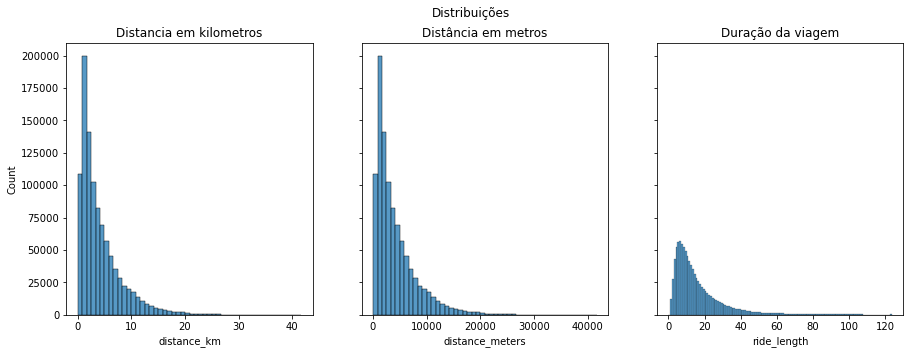

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Distribuições')

sns.histplot(ax=axes[0], x=sample_df['distance_km'], bins=50, data=sample_df)
axes[0].set_title('Distancia em kilometros')

sns.histplot(ax=axes[1], x=sample_df['distance_meters'], bins=50, data=sample_df)
axes[1].set_title('Distância em metros')

sns.histplot(ax=axes[2], x=sample_df['ride_length'], bins=range(0, 125), data=sample_df)
axes[2].set_title('Duração da viagem')

plt.show()

### Análise de Outliers

In [28]:
#Numero de outliers por coluna
Q1 = sample_df.quantile(0.25)
Q3 = sample_df.quantile(0.75)
IQR = Q3 - Q1
((sample_df.select_dtypes('number') < (Q1 - 1.5 * IQR)) | (sample_df.select_dtypes('number') > (Q3 + 1.5 * IQR))).sum()

index                  0
start_lat          77237
start_lng          28666
end_lat            77178
end_lng            29312
ride_length        71870
hour_of_day        15758
distance_km        55835
distance_meters    55835
dtype: int64

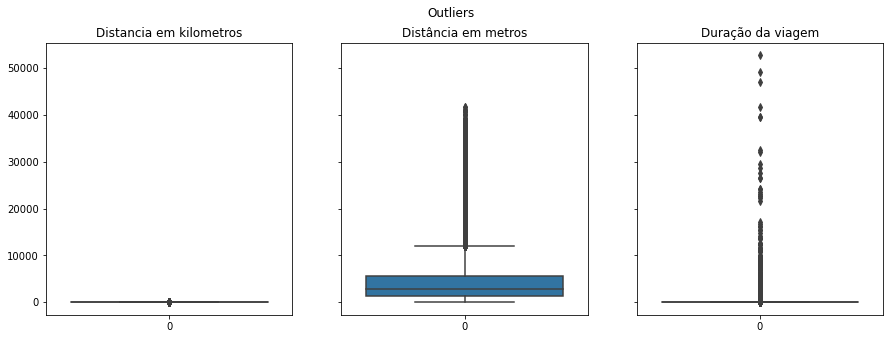

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Outliers')

sns.boxplot(ax=axes[0], data=sample_df['distance_km'])
axes[0].set_title('Distancia em kilometros')

sns.boxplot(ax=axes[1], data=sample_df['distance_meters'])
axes[1].set_title('Distância em metros')

sns.boxplot(ax=axes[2], data=sample_df['ride_length'])
axes[2].set_title('Duração da viagem')

plt.show()

Dado o número de outliers estaremos os tratando para enfim usar a média.

In [29]:
cols = ['ride_length', 'distance_meters', 'distance_km']
from numpy import percentile
for x in cols:
    Q3,Q1 = np.percentile(sample_df.loc[:,x],[75,25])
    IQR = Q3-Q1
 
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)
 
    sample_df.loc[sample_df[x] < min,x] = np.nan
    sample_df.loc[sample_df[x] > max,x] = np.nan

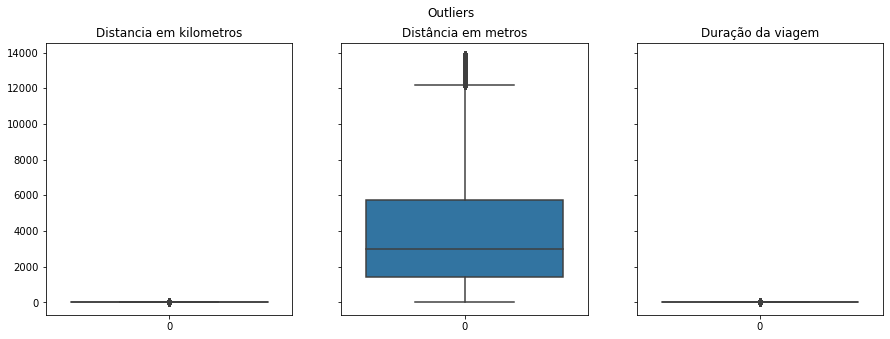

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Outliers')

sns.boxplot(ax=axes[0], data=sample_df['distance_km'])
axes[0].set_title('Distancia em kilometros')

sns.boxplot(ax=axes[1], data=sample_df['distance_meters'])
axes[1].set_title('Distância em metros')

sns.boxplot(ax=axes[2], data=sample_df['ride_length'])
axes[2].set_title('Duração da viagem')

plt.show()

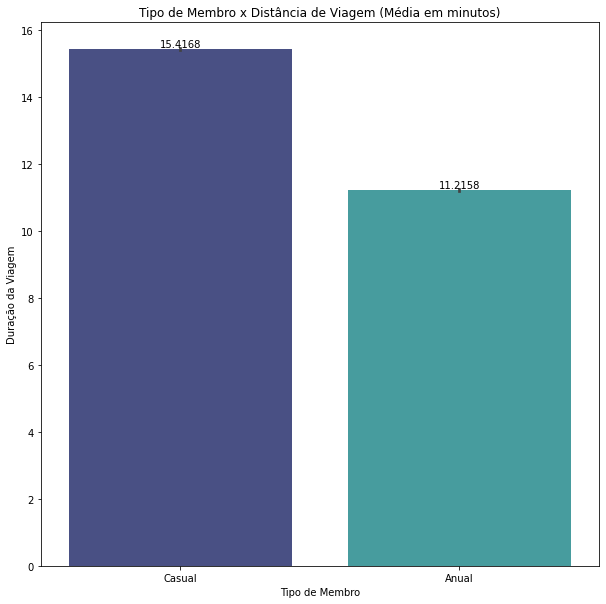

In [31]:
label_membro = ['Casual', 'Anual']

plt.figure(figsize=(10,10))
plt.title("Tipo de Membro x Distância de Viagem (Média em minutos)")

ax = sns.barplot(x = 'member_casual', y = 'ride_length', palette='mako', data = sample_df)
ax.set_xticklabels(label_membro)

plt.xlabel("Tipo de Membro")
plt.ylabel("Duração da Viagem")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

O gráfico acima demonstra que em tese membros casuais passam mais tempo pedalando do que membros pagantes anuais, mas isso pode não ser 100% preciso pois não sabemos as exatas razões para tal. Em alguns casos isso pode indicar que membros casuais e até mesmo anuais pagantes podem estar estacionados enquanto o timer do serviço continua a contar como nos registros a seguir.

In [31]:
sample_df[(sample_df['ride_length'] > 30.0)
         & (sample_df['distance_km'] < 1)]

,index,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,hour_of_day,distance_km,distance_meters
106,589122,0FCF3F78747B79EC,electric_bike,2022-05-09 18:36:04,2022-05-09 19:43:19,41.909410,-87.677549,41.910000,-87.670000,casual,67.0,Monday,18,0.644332,644.331792
125,163565,9C1049A91192E0E1,electric_bike,2021-09-05 22:58:19,2021-09-05 23:45:25,41.872439,-87.624076,41.872731,-87.623981,casual,47.0,Sunday,22,0.004707,4.707434
234,655256,0F97886C950C46BD,electric_bike,2021-08-07 15:49:07,2021-08-07 16:46:27,41.710000,-87.700000,41.700000,-87.730000,casual,57.0,Saturday,15,0.830224,830.223779
277,128771,17156C7AC747BF70,classic_bike,2021-06-18 15:40:27,2021-06-18 16:17:45,41.903266,-87.678435,41.926277,-87.630834,casual,37.0,Friday,15,0.840554,840.553984
290,282503,47E614092BF41E07,classic_bike,2021-07-12 12:13:16,2021-07-12 12:51:39,41.914027,-87.705126,41.914027,-87.705126,casual,38.0,Monday,12,0.010901,10.900966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999598,526337,4CCFF86405DE72D7,electric_bike,2021-08-30 20:49:34,2021-08-30 21:25:20,42.004599,-87.661497,41.932622,-87.636367,member,35.0,Monday,20,0.844529,844.528750
999622,210472,1D2826C89945EF28,electric_bike,2022-04-23 12:08:20,2022-04-23 13:12:31,41.924870,-87.714436,41.918306,-87.636282,member,64.0,Saturday,12,0.480425,480.424869
999676,85297,169418044F2C088D,electric_bike,2022-03-13 16:55:17,2022-03-13 20:13:25,41.891515,-87.626875,41.891466,-87.626761,member,198.0,Sunday,16,0.012100,12.099997
999677,95271,E406043237BCC319,classic_bike,2021-07-18 07:45:16,2021-07-18 08:27:18,41.857611,-87.619407,41.925858,-87.638973,member,42.0,Sunday,7,0.607647,607.647256


Nos registros acima podemos ver que diversas linhas possuem tempos de viagem extensos se comparados às distâncias percorridas, isto pode enriquecer a hipótese de que tanto membros casuais quanto pagantes passam boa parte do tempo estacionados.

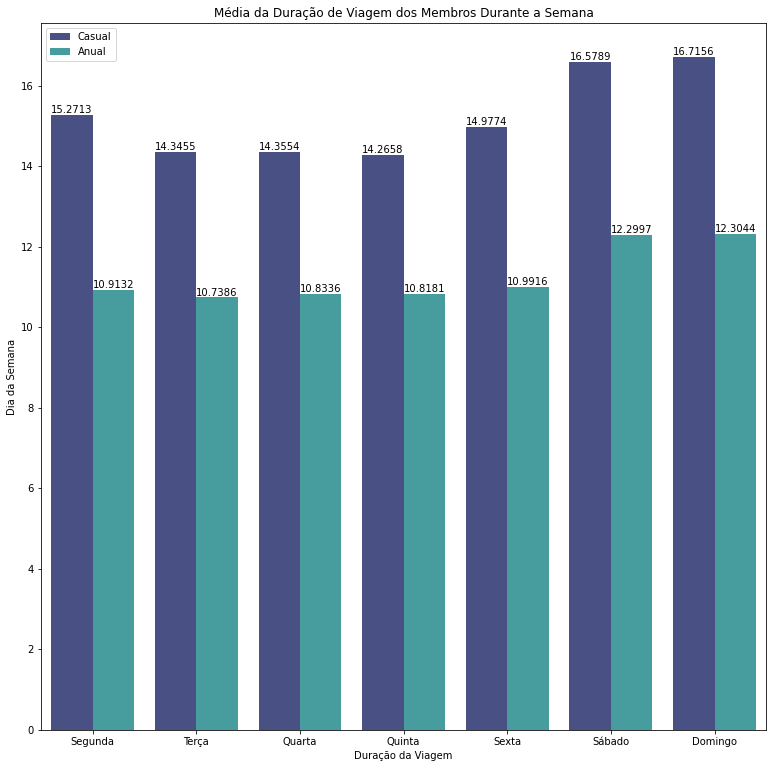

In [50]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(13,13))
plt.title("Média da Duração de Viagem dos Membros Durante a Semana")

ax = sns.barplot(x = 'day_of_week', y = 'ride_length', hue = 'member_casual', palette='mako', 
                 order=order, ci = None, data = sample_df)

ax.set_xticklabels(labels)
ax.legend(labels=['Casual', 'Anual'])

plt.xlabel("Duração da Viagem")
plt.ylabel("Dia da Semana")

for container in ax.containers:
    ax.bar_label(container)

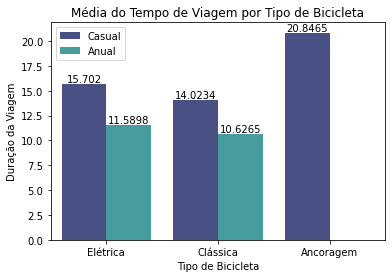

In [49]:
label_bike = ['Elétrica', 'Clássica', 'Ancoragem']
plt.title("Média do Tempo de Viagem por Tipo de Bicicleta")

ax = sns.barplot(x = 'rideable_type', y = 'ride_length', hue = 'member_casual', palette='mako', data = sample_df, ci = None)

ax.legend(labels=['Casual', 'Anual'])
ax.set_xticklabels(label_bike)

plt.xlabel("Tipo de Bicicleta")
plt.ylabel("Duração da Viagem")

for container in ax.containers:
    ax.bar_label(container)

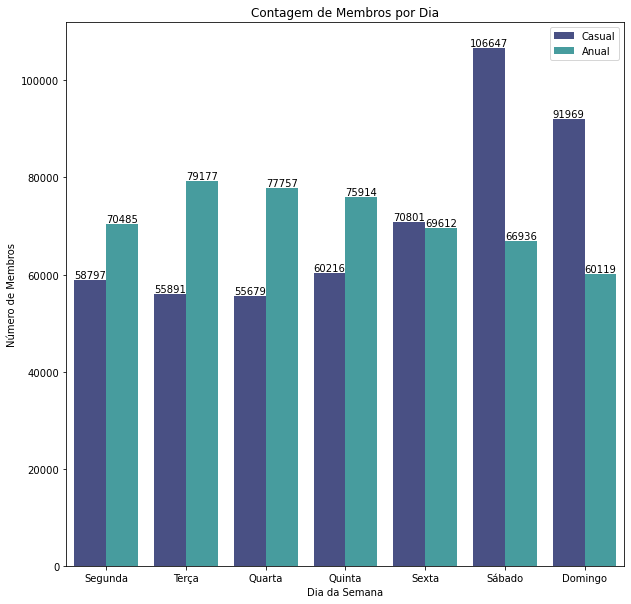

In [129]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(10,10))
plt.title("Contagem de Membros por Dia")

ax = sns.countplot(x = 'day_of_week', hue = 'member_casual', palette='mako', order=order, data = sample_df)
ax.set_xticklabels(labels)
ax.legend(labels=['Casual', 'Anual'])

plt.xlabel("Dia da Semana")
plt.ylabel("Número de Membros")

for container in ax.containers:
    ax.bar_label(container)

A contagem de membros por dia da semana indica que durante os finais de semana membros casuais são quase o dobro de membros pagantes anuais. Esse pode ser um ponto a ser explorado no futuro pelas campanhas de marketing para atrair novos membros.

Text(0.5, 0, 'Hora do Dia')

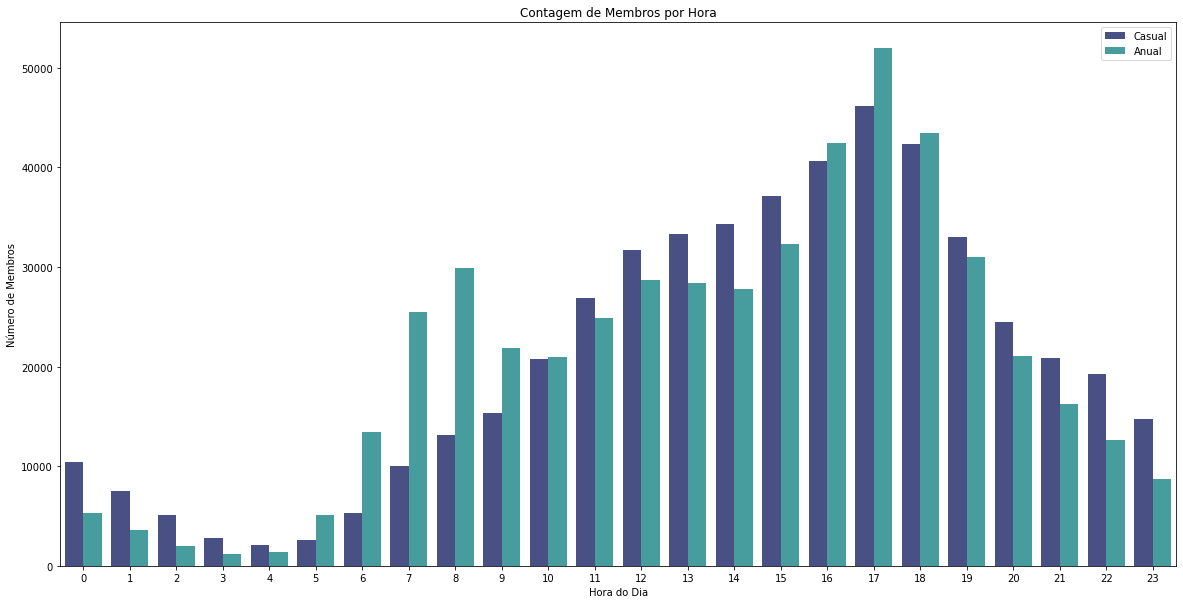

In [142]:
plt.figure(figsize=(20,10))
plt.title("Contagem de Membros por Hora")

ax = sns.countplot(x = 'hour_of_day', hue = 'member_casual', palette='mako', data = sample_df)
ax.legend(labels=['Casual', 'Anual'])

plt.ylabel("Número de Membros")
plt.xlabel("Hora do Dia")


Aqui temos 2 períodos onde o fluxo de usuários aumenta, das 5 as 8 da manhã e das 15 as 17. Este fenômeno pode ser explicado por serem horários onde as pessoas estão geralmente se deslocando para o trabalho ou vindo dele. Também pode-se observar que durante grande parte do dia o número de membros casuais supera o de membros pagantes anuais exceto nos horários de pico.

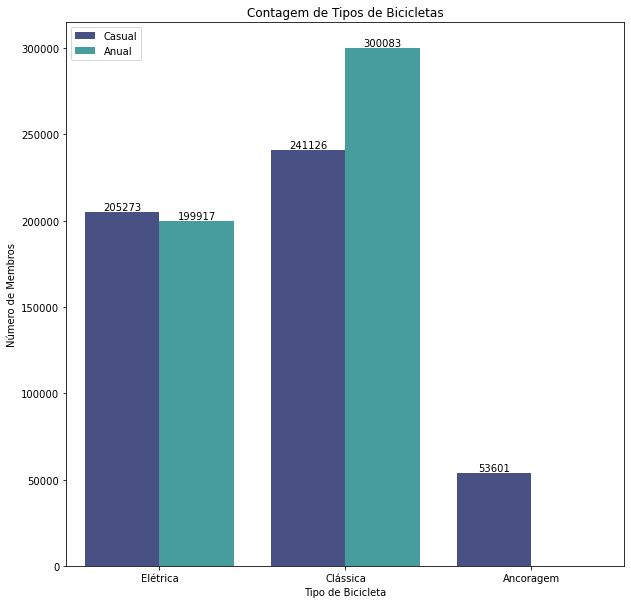

In [143]:
label_bike = ['Elétrica', 'Clássica', 'Ancoragem']
plt.figure(figsize=(10,10))
plt.title("Contagem de Tipos de Bicicletas")

ax = sns.countplot(x = 'rideable_type', hue = 'member_casual', palette='mako', data = sample_df)
ax.legend(labels=['Casual', 'Anual'])
ax.set_xticklabels(label_bike)

plt.ylabel("Número de Membros")
plt.xlabel("Tipo de Bicicleta")

for container in ax.containers:
    ax.bar_label(container)

Aqui vemos que membros pagantes anuais não usam bicicletas ancoradas, mas por outro lado, eles utilizam bicicletas comuns muito mais do que os membros casuais. Isto pode nos levar a uma estratégia envolvendo algum benefício aos que utilizam bicicletas ancoradas ou algo que transforme os usuários de bicicletas comuns em membros pagantes anuais.

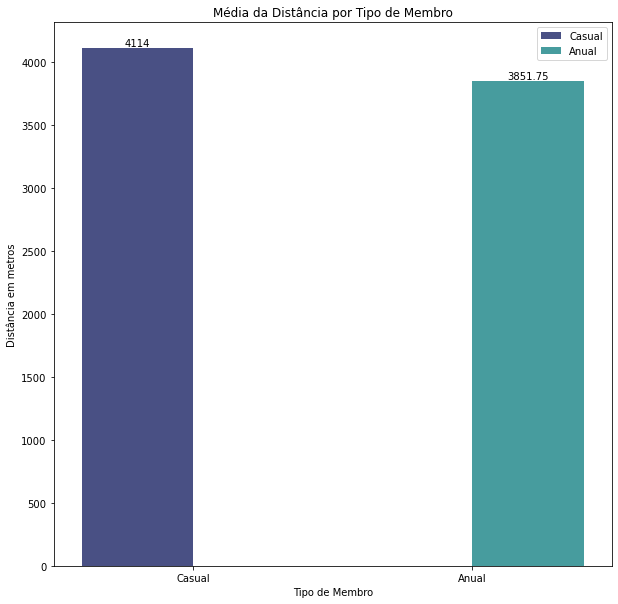

In [47]:
label_membro = ['Casual', 'Anual']

plt.figure(figsize=(10,10))
plt.title("Média da Distância por Tipo de Membro")

ax = sns.barplot(x = 'member_casual', y = 'distance_meters', palette='mako', hue = 'member_casual', 
                 ci = None, data = sample_df)
ax.legend(labels=['Casual', 'Anual'])
ax.set_xticklabels(label_membro)

plt.ylabel("Distância em metros")
plt.xlabel("Tipo de Membro")

for container in ax.containers:
    ax.bar_label(container)

Quando falamos de distâncias, membros casuais viajam um pouco mais do que os pagantes anuais.

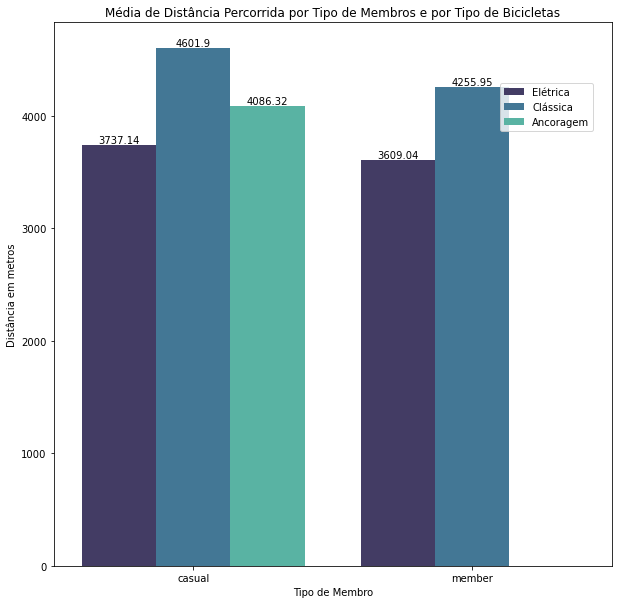

In [43]:
plt.figure(figsize=(10,10))
plt.title("Média de Distância Percorrida por Tipo de Membros e por Tipo de Bicicletas")

ax = sns.barplot(x = 'member_casual', y = 'distance_meters', palette='mako', hue = 'rideable_type', 
                 ci = None, data = sample_df)
ax.legend(labels=['Elétrica', 'Clássica', 'Ancoragem'], loc=(0.8, 0.8))

plt.ylabel("Distância em metros")
plt.xlabel("Tipo de Membro")

for container in ax.containers:
    ax.bar_label(container)



Aprofundando a busca podemos ver que os membros percorrem distâncias maiores com bicicletas comuns quando comparadas aos outros tipos.

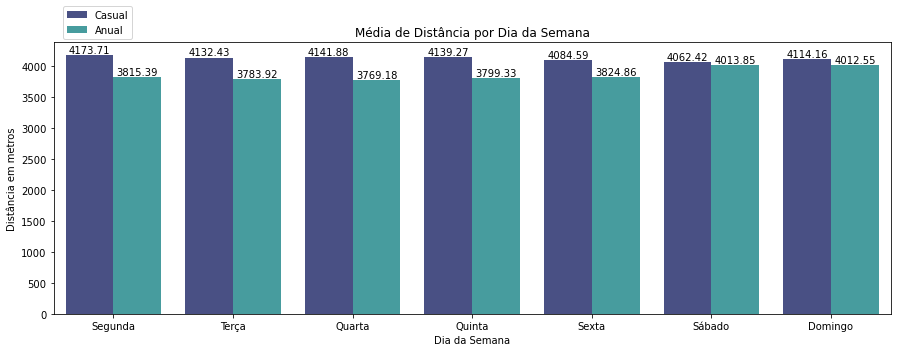

In [46]:
plt.figure(figsize=(15,5))
plt.title("Média de Distância por Dia da Semana")

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

ax = sns.barplot(x = 'day_of_week', y = 'distance_meters', palette='mako', hue = 'member_casual', 
                 ci = None, order=order, data = sample_df)

ax.set_xticklabels(labels)
plt.legend(bbox_to_anchor = (0.1, 1.15), labels=['Casual', 'Anual'])
plt.ylabel("Distância em metros")
plt.xlabel("Dia da Semana")

for container in ax.containers:
    ax.bar_label(container)

Durante toda a semana membros casuais tem uma maior distância percorrida comparada com os fins de semana.

### Gráficos detalhados por tipo de bicicleta

In [32]:
sample_df_bike = sample_df[['day_of_week', 'hour_of_day', 'ride_length', 'distance_km', 'distance_meters', 'rideable_type']].set_index('rideable_type')

electric = sample_df_bike.loc['electric_bike']
docked = sample_df_bike.loc['docked_bike']
classic = sample_df_bike.loc['classic_bike']

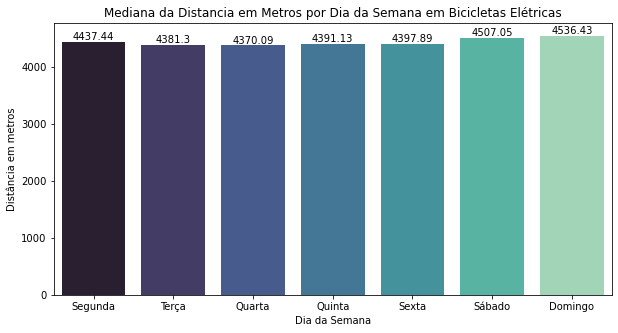

In [33]:
#electric
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(10,5))
plt.title('Média da Distancia em Metros por Dia da Semana em Bicicletas Elétricas')

ax = sns.barplot(x = electric['day_of_week'], y = electric['distance_meters'], palette='mako', 
                 ci=None, order=order)
ax.set_xticklabels(labels)
plt.ylabel("Distância em metros")
plt.xlabel("Dia da Semana")

for container in ax.containers:
    ax.bar_label(container)


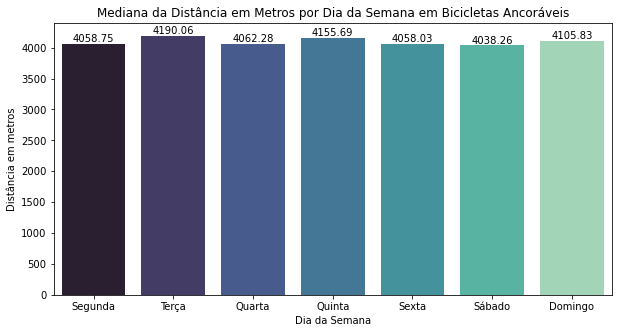

In [34]:
#docked
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(10,5))
plt.title('Média da Distância em Metros por Dia da Semana em Bicicletas Ancoráveis')

ax = sns.barplot(x = docked['day_of_week'], y = docked['distance_meters'], palette='mako', 
                 ci=None, order=order)
plt.ylabel("Distância em metros")
plt.xlabel("Dia da Semana")
ax.set_xticklabels(labels)

for container in ax.containers:
    ax.bar_label(container)

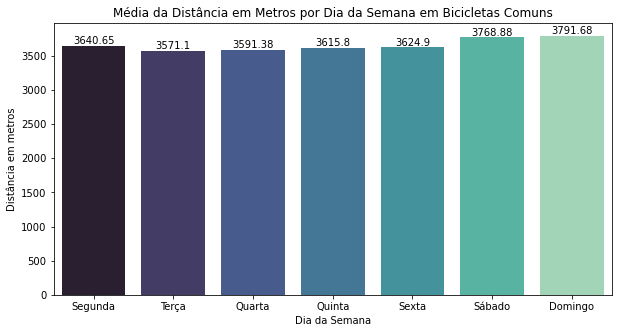

In [45]:
#classic
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(10,5))
plt.title('Média da Distância em Metros por Dia da Semana em Bicicletas Comuns')

ax = sns.barplot(x = classic['day_of_week'], y = classic['distance_meters'], palette='mako', 
                 ci=None, order=order)
ax.set_xticklabels(labels)
plt.ylabel("Distância em metros")
plt.xlabel("Dia da Semana")

for container in ax.containers:
    ax.bar_label(container)


### Gráficos detalhados por tipo de usuário

In [36]:
sample_df_member = sample_df[['day_of_week', 'hour_of_day', 'ride_length', 'distance_km', 
                              'distance_meters', 'member_casual']].set_index('member_casual')

casual = sample_df_member.loc['casual']
member = sample_df_member.loc['member']

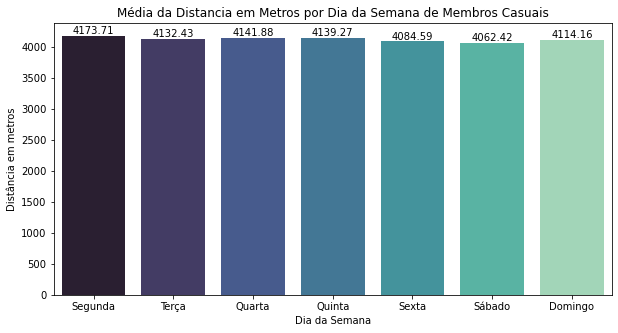

In [44]:
#membros casuais
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(10,5))
plt.title('Média da Distancia em Metros por Dia da Semana de Membros Casuais')

ax = sns.barplot(x = casual['day_of_week'], y = casual['distance_meters'], palette='mako', 
                 ci=None, order=order)
ax.set_xticklabels(labels)
plt.ylabel("Distância em metros")
plt.xlabel("Dia da Semana")

for container in ax.containers:
    ax.bar_label(container)

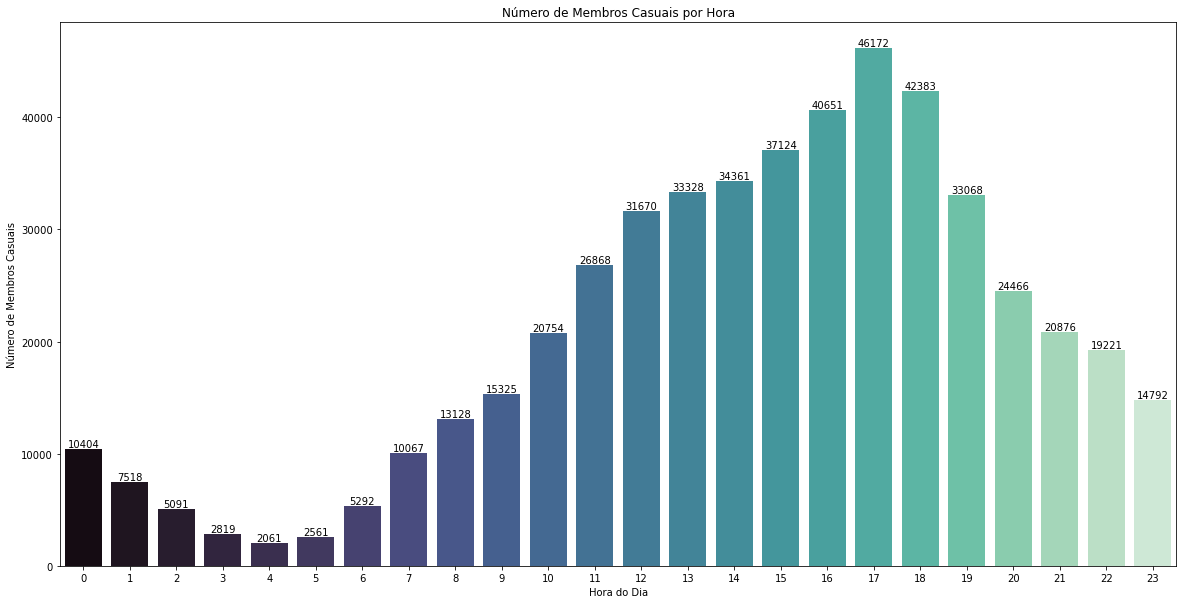

In [97]:
plt.figure(figsize=(20,10))
plt.title("Número de Membros Casuais por Hora")

ax = sns.countplot(x = 'hour_of_day', palette='mako', data = casual)
plt.ylabel("Número de Membros Casuais")
plt.xlabel("Hora do Dia")

for container in ax.containers:
    ax.bar_label(container)

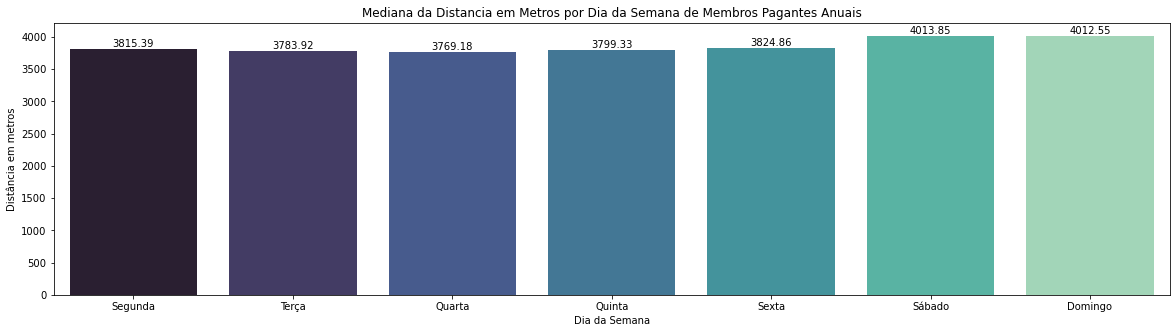

In [38]:
#membros pagantes anuais
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
labels = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']

plt.figure(figsize=(20,5))
plt.title('Mediana da Distancia em Metros por Dia da Semana de Membros Pagantes Anuais')

ax = sns.barplot(x = member['day_of_week'], y = member['distance_meters'], palette='mako', 
                 ci=None, order=order)
ax.set_xticklabels(labels)
plt.ylabel("Distância em metros")
plt.xlabel("Dia da Semana")

for container in ax.containers:
    ax.bar_label(container)

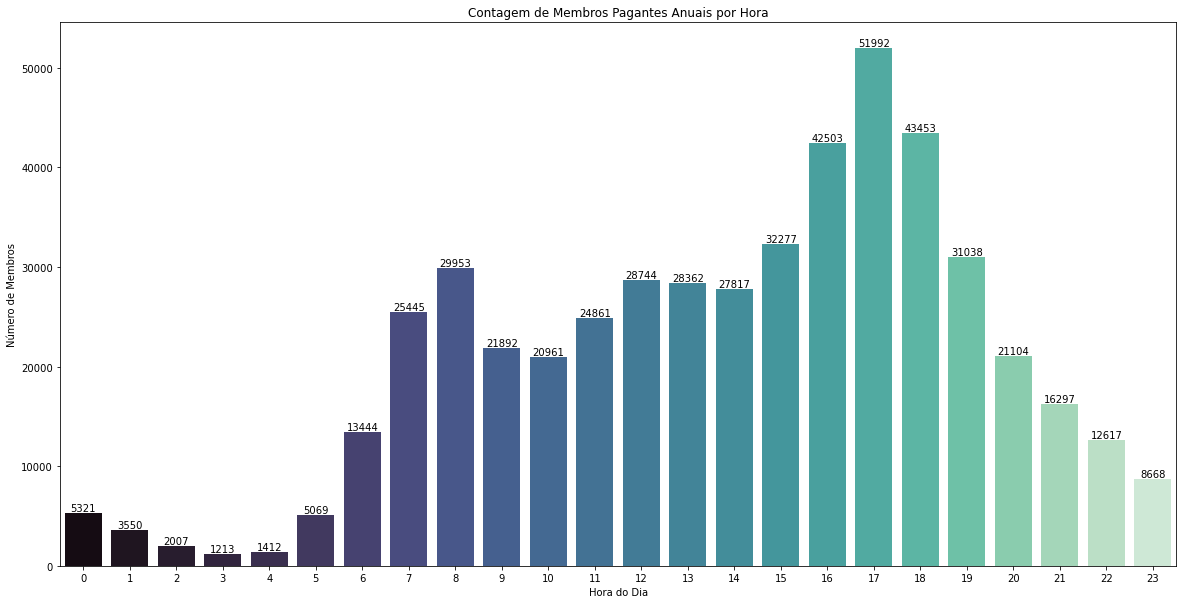

In [99]:
plt.figure(figsize=(20,10))
plt.title("Contagem de Membros Pagantes Anuais por Hora")

ax = sns.countplot(x = 'hour_of_day', palette='mako', data = member)
plt.ylabel("Número de Membros")
plt.xlabel("Hora do Dia")

for container in ax.containers:
    ax.bar_label(container)

### Observações

#### As seguintes observações são baseadas na amostra que contém 1000000 registros.

A duração mediana de viagem de membros pagantes anuais e membros casuais é de 11 e 15 minutos respectivamente;<br> <br>
A distância mediana de viagem é de 4,11 kilometros para membros casuais e 3,85 kilometros para membros pagantes anuais;<br> <br>
Membros pagantes anuais não utilizam bicicletas ancoráveis;<br> <br>
Durante os fins de semana a quantidade de membros casuais atingiu 1066647 aos Sábados e 91969 aos Domingos o que é quase o dobro de membros anuais pagantes que contam com 66936 e 60119 nos mesmos dias.

### Deduções

Uma pequena fatia dos membros anuais pagantes e casuais aparentam passar boa parte do tempo estacionados; <br> <br>
Durante os fins de semana, membros casuais viajam distâncias maiores do que os anuais pagantes;<br> <br>
Exceto fins de semana, o número de membros anuais pagantes é maior do que o de casuais, isso indica que muitos membros casuais apenas utilizam bicicletas como lazer;<br> <br>
Existem dois picos de usuários, um na parte da manhã (5 às 8) e outro no final da tarde (15 às 17), que podem ser explicados por serem horários onde a maioria das pessoas vão e voltam de seus trabalhos.

# Fase de Ação
---

### Conclusão

Nesta análise tivemos alguns pontos que se sobressaíram, o número alto de membros casuais durante os fins de semana, a falta de membros pagantes anuais utilizando bicicletas ancoráveis, a grande quantidade de membros tanto casuais quanto pagantes anuais que utilizam bicicletas elétricas e por fim que alguns usuários passam boa parte do tempo estacionados enquanto o cronômetro segue a contar.

### Recomendações

1. Criar um segmento de assinatura que seja mais benéfico para os finais de semana, como por exemplo preços menores ou programa de milhagens que aumenta apenas neste período; <br><br>
2. Campanha onde o alvo são bicicletas ancoráveis, mesmo que não sejam uma grande fatia de usuários, elas podem abrir portas para novas oportunidades pois fora constatado que membros pagantes anuais não as utilizam; <br><br>
3. Com a crescente das bicicletas elétricas, pode ser uma boa ideia criar campanhas ecologicamente responsáveis nas mídias sociais as envolvendo, talvez até em parceria com outras marcas que também são eco-friendly; <br><br>
4. Incentivar os usuários através de campanhas a utilizarem as bicicletas em horários variados a fim de captar usuários com perfis de uso diferentes.